#**Extra Trees**


## Experiment 4: Binary Classification with  with Extra Trees

In this experiment, we will train a binary classifier using Extra Trees


Dataset can be downloaded https://drive.google.com/drive/folders/1_50s_IxJsABTRFTWBR0XjuSOnDL4YFuQ

The steps are:
1.   Load and explore dataset
2.   Prepare Data
3.   Split Data
4.   Assess Baseline Model
5.   Train Initial Extra Trees with Default Hyperparameter
6.   Reduce Overfitting with n_estimators
7.   Reduce Overfitting with max_depth
8.   Reduce Overfitting with min_samples_leaf
9.   Reduce Overfitting with max_features
10.  Features Importance
11. Hyperparameter tuning with Grid Search
12. Hyperparameter tuning with Random Search

### 1. Load and Explore Dataset

**[1.1]** Import the pandas and numpy package

In [ ]:
import pandas as pd
import numpy as np

**[1.2]** Mounting the drive

You must allow access to your drive by signing in to your Google account
In this notebook, I'm mounting the Google drive to read a csv file that is stored on my drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# After executing the cell above, Drive files will be present in "/content/drive/My Drive". The below command lists the contents in the drive:
!ls "/content/drive/My Drive"

 AT2_default_template.gdoc
 atlassian_reviews.csv
 CNN_Articles_2021-2023.csv
 CNN_Articles_2021-2023.gsheet
'Colab Notebooks'
'Copy of Data meaning https:  tinyurl.com DSI-Dmean-c (1).gsheet'
'Copy of Data meaning https:  tinyurl.com DSI-Dmean-c (2).gsheet'
'Copy of Data meaning https:  tinyurl.com DSI-Dmean-c (3).gsheet'
'Copy of Data meaning https:  tinyurl.com DSI-Dmean-c.gsheet'
'Copy of MLAA - Lecture 1.gslides'
'Copy of MLAA - Lecture 2.gslides'
'Copy of MLAA - Lecture 5.gslides'
 data
'DSP_AT3 _REPORT.gdoc'
'DSP - Lab 4 - Exercise 1 - Solutions.gdoc'
 DVN_data
'Experiment reports'
'Experiment reports 2'
 glassdoor_data
 Lambda_Project_Report_Draft.gdoc
 NLP_data
'ODI Data Ethics Canvas.gdoc'
'Reddit_Data (1).csv'
 Untitled
'Untitled document (1).gdoc'
'Untitled document.gdoc'


**[1.3]** Load the prepared dataset

In [ ]:
X_train = pd.read_csv('/content/drive/My Drive/data/X_train.csv', index_col=0)
X_val = pd.read_csv('/content/drive/My Drive/data/X_val.csv', index_col=0)
X_test = pd.read_csv('/content/drive/My Drive/data/X_test.csv', index_col=0)
y_train = pd.read_csv('/content/drive/My Drive/data/y_train.csv', index_col=0)
y_val = pd.read_csv('/content/drive/My Drive/data/y_val.csv', index_col=0)
y_test = pd.read_csv('/content/drive/My Drive/data/y_test.csv', index_col=0)

**[1.4]** Display the first 5 rows of df

In [ ]:
X_train.head()

,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased,gender_0,gender_Female,gender_Male
117183,2.0,2.0,1,1,1,3,2,2,2,1,2,3,2,0,1,0
80308,3.0,0.0,4,10,7,8,5,6,9,4,7,7,10,1,0,0
18279,4.0,2.0,5,9,10,10,10,10,10,4,10,3,10,0,1,0
9337,2.0,2.0,9,8,10,7,10,10,10,3,9,5,10,0,1,0
74816,5.0,0.0,8,2,6,3,10,10,3,10,3,1,3,1,0,0


## 2. Assess Baseline Model

**[2.1]** Find the mode of the target variable from the training set and print its value

In [ ]:
y_mode = y_train.mode()
y_mode

,Target
0,0


**[2.2]** Create a numpy array with the same dimensions as for the training set called `y_base` filled with this value



In [ ]:
y_shape = (len(X_train), 1)
y_base = np.full(y_shape, y_mode)

**[2.3]** Import the accuracy score from sklearn

In [ ]:
from sklearn.metrics import accuracy_score

**[2.4]** Display the accuracy score of this baseline model on the training set

In [ ]:
accuracy_score(y_train, y_base)

0.9730474443974232

## 3. Train Initial Extra Trees with Default Hyperparameter

**[3.1]** Import the ExtraTreesClassifier from sklearn.ensemble

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

**[3.2]** Instantiate the ExtraTreesClassifier class called rf1 with a random state=8

In [ ]:
et1 = ExtraTreesClassifier(random_state=42)

**[3.3]** Fit the Extra Trees model

In [ ]:
et1.fit(X_train, y_train)
y_train_preds = et1.predict(X_train)
y_val_preds = et1.predict(X_val)

<ipython-input-12-86514f867da6>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  et1.fit(X_train, y_train)


**[3.4]** Calculate the accuracy and F1 score of the ExtraTreesClassifier on the training and validation sets and print them

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))
print(f1_score(y_train, y_train_preds))
print(f1_score(y_val, y_val_preds))

0.9999905957586872
0.9922139471902505
0.9998255103821323
0.8380281690140845


## 4. Reduce Overfitting with n_estimators

**[4.1]** Train  an ExtraTreesClassifier model with n_estimators=50 and print the accuracy score and F1 score  for the training and validation sets

In [ ]:
et2_50 = ExtraTreesClassifier(random_state=42, n_estimators=50).fit(X_train, y_train)
y_train_preds = et2_50.predict(X_train)
y_val_preds = et2_50.predict(X_val)
print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))
print(f1_score(y_train, y_train_preds))
print(f1_score(y_val, y_val_preds))

<ipython-input-15-33e41eee59a3>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  et2_50 = ExtraTreesClassifier(random_state=42, n_estimators=50).fit(X_train, y_train)


0.9999905957586872
0.9922139471902505
0.9998255103821323
0.8380281690140845


**[4.2]** Train an ExtraTreesClassifier model with n_estimators=100 and print the accuracy score and F1 score for the training and validation sets

In [ ]:
et2_100 = ExtraTreesClassifier(random_state=42, n_estimators=100).fit(X_train, y_train)
y_train_preds = et2_100.predict(X_train)
y_val_preds = et2_100.predict(X_val)
print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))
print(f1_score(y_train, y_train_preds))
print(f1_score(y_val, y_val_preds))

<ipython-input-16-fb88a3537500>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  et2_100 = ExtraTreesClassifier(random_state=42, n_estimators=100).fit(X_train, y_train)


0.9999905957586872
0.9922139471902505
0.9998255103821323
0.8380281690140845


**[4.3]** Train an ExtraTreesClassifier model with n_estimators=150 and print the accuracy score and F1 score  for the training and validation sets

In [ ]:
et2_150 = ExtraTreesClassifier(random_state=42, n_estimators=150).fit(X_train, y_train)
y_train_preds = et2_150.predict(X_train)
y_val_preds = et2_150.predict(X_val)
print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))
print(f1_score(y_train, y_train_preds))
print(f1_score(y_val, y_val_preds))

<ipython-input-17-57503c3afcc3>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  et2_150 = ExtraTreesClassifier(random_state=42, n_estimators=150).fit(X_train, y_train)


0.9999905957586872
0.9922139471902505
0.9998255103821323
0.8380281690140845


**[4.4]** Train an ExtraTreesClassifier model with n_estimators=200 and print the accuracy score and F1 score for the training and validation sets

In [ ]:
et2_200 = ExtraTreesClassifier(random_state=42, n_estimators=200).fit(X_train, y_train)
y_train_preds = et2_200.predict(X_train)
y_val_preds = et2_200.predict(X_val)
print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))
print(f1_score(y_train, y_train_preds))
print(f1_score(y_val, y_val_preds))

<ipython-input-18-0593dd0ecd41>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  et2_200 = ExtraTreesClassifier(random_state=42, n_estimators=200).fit(X_train, y_train)


0.9999905957586872
0.9921293161814488
0.9998255103821323
0.8353982300884956


**[4.5]** Import confusion_matrix, ConfusionMatrixDisplay from sklearn.metrics and matplotlib

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

**[4.6]** Plot the confusion matrics for the training, validation

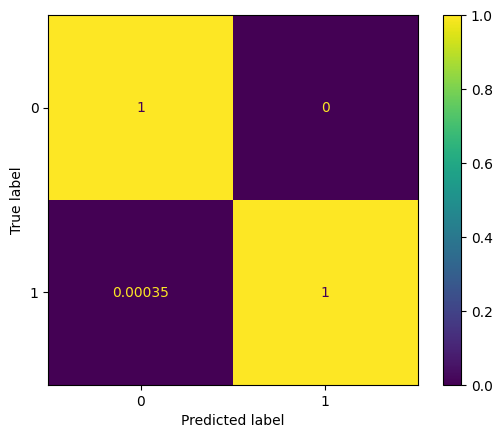

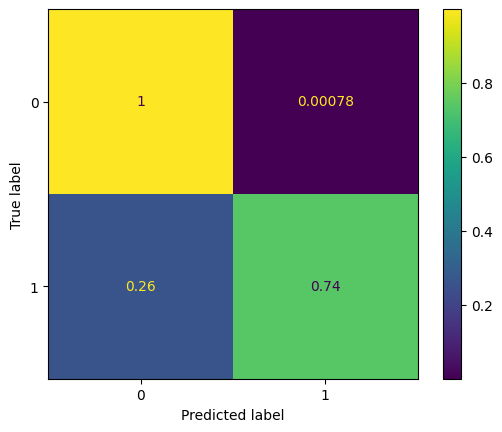

In [ ]:
ConfusionMatrixDisplay.from_estimator(et2_100, X_train, y_train, normalize='true')
ConfusionMatrixDisplay.from_estimator(et2_100, X_val, y_val, normalize='true')

## 5. Reduce Overfitting with max_depth

**[5.1]** Print the average "**max_depth**" for et2_100:

In [ ]:
np.mean([estimator.tree_.max_depth for estimator in et2_100.estimators_])

31.83

**[5.2]** Train an ExtraTreesClassifiermodel with n_estimators=100, max_depth=10 and print the accuracy score and F1 score  for the training and validation sets

In [ ]:
et3 = ExtraTreesClassifier(random_state=42, n_estimators=100, max_depth=10).fit(X_train, y_train)
y_train_preds = et3.predict(X_train)
y_val_preds = et3.predict(X_val)
print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))
print(f1_score(y_train, y_train_preds))
print(f1_score(y_val, y_val_preds))

<ipython-input-22-4cdab1bc043c>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  et3 = ExtraTreesClassifier(random_state=42, n_estimators=100, max_depth=10).fit(X_train, y_train)


0.9837400667701133
0.9817197020988491
0.5708612558947629
0.4953271028037384


**[5.3]** Train an ExtraTreesClassifier model with n_estimators=100, max_depth=20 and print the accuracy score and F1 score  for the training and validation sets

In [ ]:
et4 = ExtraTreesClassifier(random_state=42, n_estimators=100, max_depth=20).fit(X_train, y_train)
y_train_preds = et4.predict(X_train)
y_val_preds = et4.predict(X_val)
print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))
print(f1_score(y_train, y_train_preds))
print(f1_score(y_val, y_val_preds))

<ipython-input-23-0dd3752209f0>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  et4 = ExtraTreesClassifier(random_state=42, n_estimators=100, max_depth=20).fit(X_train, y_train)


0.9994075327972916
0.9922139471902505
0.9888869289116247
0.8380281690140845


**[5.4]** Train an ExtraTreesClassifier model with n_estimators=100, max_depth=30 and print the accuracy score and F1 score  for the training and validation sets

In [ ]:
et5 = ExtraTreesClassifier(random_state=42, n_estimators=150, max_depth=30).fit(X_train, y_train)
y_train_preds = et5.predict(X_train)
y_val_preds = et5.predict(X_val)
print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))
print(f1_score(y_train, y_train_preds))
print(f1_score(y_val, y_val_preds))

<ipython-input-24-d23271d94f94>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  et5 = ExtraTreesClassifier(random_state=42, n_estimators=150, max_depth=30).fit(X_train, y_train)


0.9999905957586872
0.9924678402166554
0.9998255103821323
0.8441330998248686


**[5.5]** Plot the confusion matrics for the training, validation

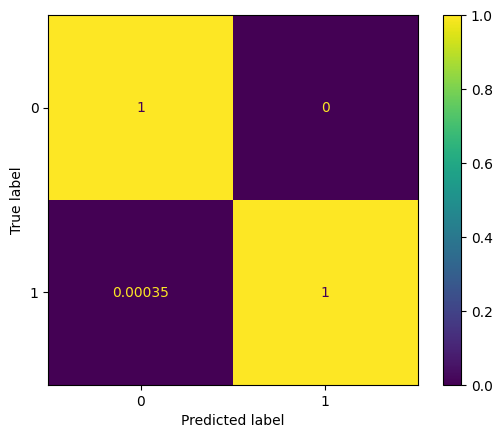

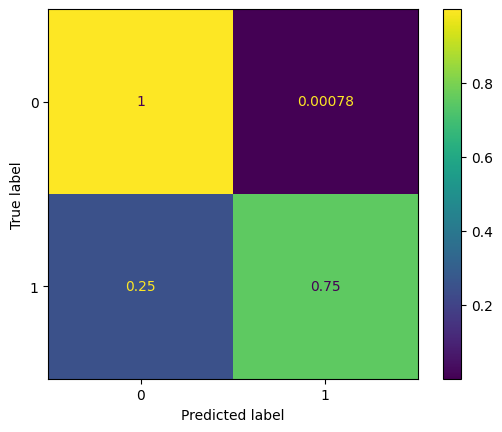

In [ ]:
ConfusionMatrixDisplay.from_estimator(et5, X_train, y_train, normalize='true')
ConfusionMatrixDisplay.from_estimator(et5, X_val, y_val, normalize='true')

## 6.   Reduce Overfitting with min_samples_leaf

**[6.1]** Train an ExtraTreesClassifier model with n_estimators=100, max_depth=30, min_samples_leaf=1 and print the accuracy score and F1 score  for the training and validation sets

In [ ]:
et6 = ExtraTreesClassifier(random_state=42, n_estimators=100,max_depth=30, min_samples_leaf=1).fit(X_train, y_train)
y_train_preds = et6.predict(X_train)
y_val_preds = et6.predict(X_val)
print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))
print(f1_score(y_train, y_train_preds))
print(f1_score(y_val, y_val_preds))

<ipython-input-26-2dd1acf8f1bb>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  et6 = ExtraTreesClassifier(random_state=42, n_estimators=100,max_depth=30, min_samples_leaf=1).fit(X_train, y_train)


0.9999905957586872
0.9922985781990521
0.9998255103821323
0.8400702987697716


**[6.1]** Train an ExtraTreesClassifier model with n_estimators=100, max_depth=30, min_samples_leaf=2 and print the accuracy score and F1 score  for the training and validation sets

In [ ]:
et7 = ExtraTreesClassifier(random_state=42, n_estimators=100,max_depth=30, min_samples_leaf=2).fit(X_train, y_train)
y_train_preds = et7.predict(X_train)
y_val_preds = et7.predict(X_val)
print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))
print(f1_score(y_train, y_train_preds))
print(f1_score(y_val, y_val_preds))

<ipython-input-27-bf4bcab22738>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  et7 = ExtraTreesClassifier(random_state=42, n_estimators=100,max_depth=30, min_samples_leaf=2).fit(X_train, y_train)


0.9986551934922651
0.9908598510494245
0.9744231801108925
0.8043478260869565


**[6.2]** Train an ExtraTreesClassifier model with n_estimators=100, max_depth=30, min_samples_leaf=10 and print the accuracy score and F1 score for the training and validation sets

In [ ]:
et8 = ExtraTreesClassifier(random_state=42, n_estimators=100, max_depth=30, min_samples_leaf=10).fit(X_train, y_train)
y_train_preds = et8.predict(X_train)
y_val_preds = et8.predict(X_val)
print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))
print(f1_score(y_train, y_train_preds))
print(f1_score(y_val, y_val_preds))

<ipython-input-28-8fbd778f1534>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  et8 = ExtraTreesClassifier(random_state=42, n_estimators=100, max_depth=30, min_samples_leaf=10).fit(X_train, y_train)


0.9901819720694033
0.9874746106973595
0.7815899581589958
0.7051792828685257


**[6.3]** Train an ExtraTreesClassifier model with n_estimators=100, max_depth=30, min_samples_leaf=5 and print the accuracy score and F1 score for the training and validation sets

In [ ]:
et9 = ExtraTreesClassifier(random_state=42, n_estimators=100, max_depth=30, min_samples_leaf=5).fit(X_train, y_train)
y_train_preds = et9.predict(X_train)
y_val_preds = et9.predict(X_val)
print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))
print(f1_score(y_train, y_train_preds))
print(f1_score(y_val, y_val_preds))

<ipython-input-29-9cadc069274a>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  et9 = ExtraTreesClassifier(random_state=42, n_estimators=100, max_depth=30, min_samples_leaf=5).fit(X_train, y_train)


0.9938214134574693
0.9897596479350034
0.8725509214354994
0.7721280602636533


**[6.4]** Plot the confusion matrics for the training, validation

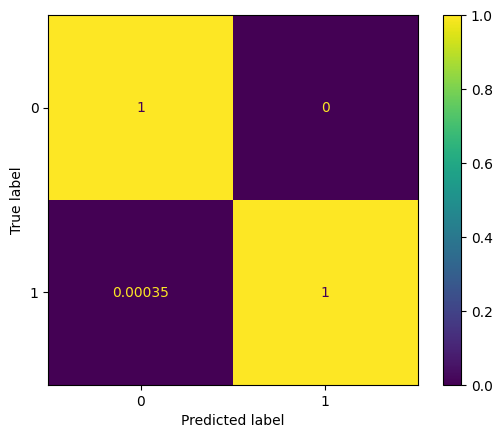

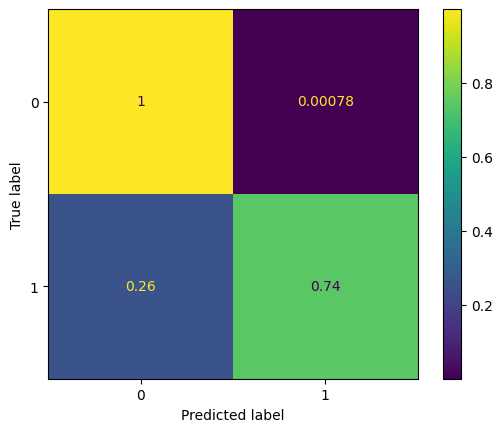

In [ ]:
ConfusionMatrixDisplay.from_estimator(et6, X_train, y_train, normalize='true')
ConfusionMatrixDisplay.from_estimator(et6, X_val, y_val, normalize='true')

## 7.   Reduce Overfitting with max_features

**[7.1]** Train an ExtraTreesClassifier model with n_estimators=100, max_depth=30, max_features=2 and print the accuracy score and F1 score  for the training and validation sets

In [ ]:
et10 = ExtraTreesClassifier(random_state=42, n_estimators=100, max_depth=30, max_features=2).fit(X_train, y_train)
y_train_preds = et10.predict(X_train)
y_val_preds = et10.predict(X_val)
print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))
print(f1_score(y_train, y_train_preds))
print(f1_score(y_val, y_val_preds))

<ipython-input-31-b8a894b73707>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  et10 = ExtraTreesClassifier(random_state=42, n_estimators=100, max_depth=30, max_features=2).fit(X_train, y_train)


0.9999905957586872
0.9888287068381855
0.9998255103821323
0.7461538461538462


**[7.2]** Train an ExtraTreesClassifier model with n_estimators=100, max_depth=30, max_features=5 and print the accuracy score and F1 score for the training and validation sets

In [ ]:
et11 = ExtraTreesClassifier(random_state=42, n_estimators=100, max_depth=30, max_features=5).fit(X_train, y_train)
y_train_preds = et11.predict(X_train)
y_val_preds = et11.predict(X_val)
print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))
print(f1_score(y_train, y_train_preds))
print(f1_score(y_val, y_val_preds))

<ipython-input-32-43c4b841a473>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  et11 = ExtraTreesClassifier(random_state=42, n_estimators=100, max_depth=30, max_features=5).fit(X_train, y_train)


0.9999905957586872
0.992552471225457
0.9998255103821323
0.8456140350877193


**[7.3]** Train an ExtraTreesClassifier model with n_estimators=100, max_depth=30, max_features= 10 and print the accuracy score and F1 score for the training and validation sets

In [ ]:
et12 = ExtraTreesClassifier(random_state=42, n_estimators=100, max_depth=30, max_features=10).fit(X_train, y_train)
y_train_preds = et12.predict(X_train)
y_val_preds = et12.predict(X_val)
print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))
print(f1_score(y_train, y_train_preds))
print(f1_score(y_val, y_val_preds))

<ipython-input-33-79dc6b221aed>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  et12 = ExtraTreesClassifier(random_state=42, n_estimators=100, max_depth=30, max_features=10).fit(X_train, y_train)


0.9999905957586872
0.9943297224102912
0.9998255103821323
0.8873949579831933


**[7.4]** Train an ExtraTreesClassifier model with n_estimators=100,max_depth=30, max_features= 15 and print the accuracy score and F1 score  for the training and validation sets

In [ ]:
et13 = ExtraTreesClassifier(random_state=42, n_estimators=100, max_depth=30, max_features=15).fit(X_train, y_train)
y_train_preds = et13.predict(X_train)
y_val_preds = et13.predict(X_val)
print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))
print(f1_score(y_train, y_train_preds))
print(f1_score(y_val, y_val_preds))

<ipython-input-34-64e1bbc26c2d>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  et13 = ExtraTreesClassifier(random_state=42, n_estimators=100, max_depth=30, max_features=15).fit(X_train, y_train)


0.9999905957586872
0.994583615436696
0.9998255103821323
0.8922558922558922


**[7.5]** Plot the confusion matrics for the training, validation

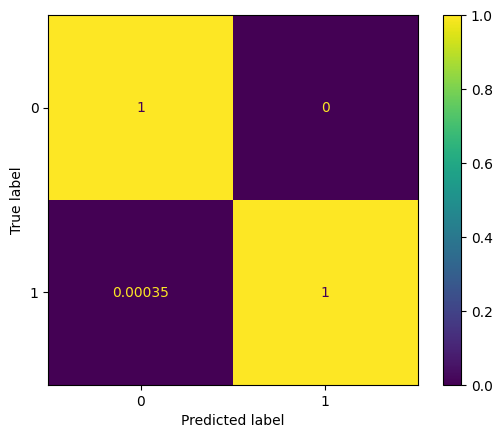

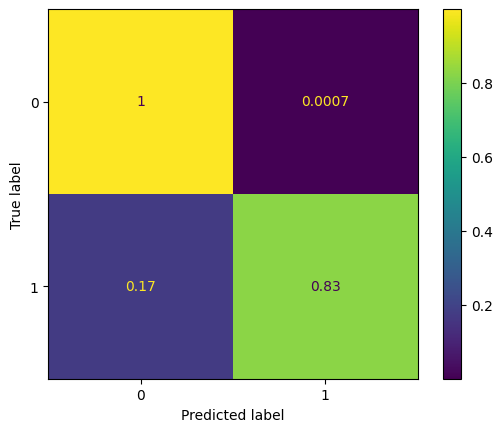

In [ ]:
ConfusionMatrixDisplay.from_estimator(et13, X_train, y_train, normalize='true')
ConfusionMatrixDisplay.from_estimator(et13, X_val, y_val, normalize='true')

**[7.5]** Print the accuracy score of the best model on the testing set

In [ ]:
y_test_preds = et13.predict(X_test)
print(accuracy_score(y_test, y_test_preds))
print(f1_score(y_test, y_test_preds))

0.9946678854357099
0.8878205128205129


**[7.6]** Task: Plot the confusion matrics for the training, validation and testing sets

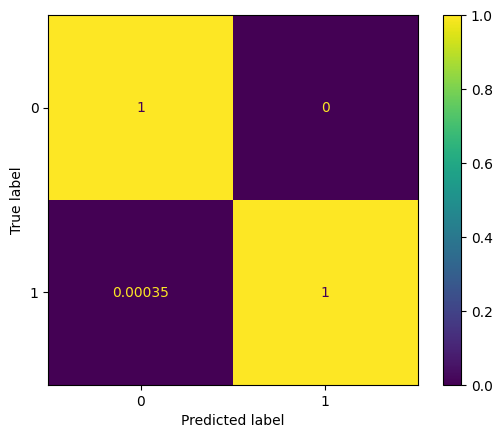

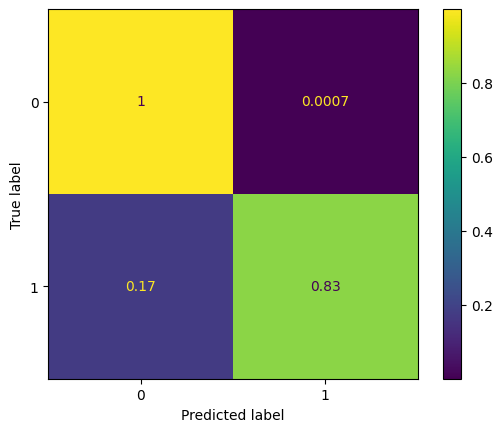

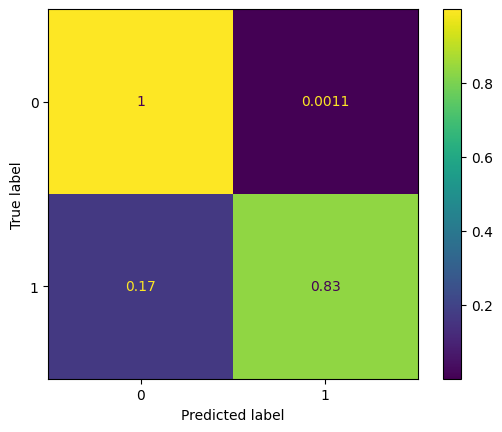

In [ ]:
ConfusionMatrixDisplay.from_estimator(et13, X_train, y_train, normalize='true')
ConfusionMatrixDisplay.from_estimator(et13, X_val, y_val, normalize='true')
ConfusionMatrixDisplay.from_estimator(et13, X_test, y_test, normalize='true')

## 8.  Features Importance


**[8.1]** Task: Print the features importance of et12

In [ ]:
et13.feature_importances_

array([0.02146269, 0.01405414, 0.08870238, 0.07118195, 0.0650587 ,
       0.04616093, 0.03547133, 0.0397183 , 0.1139592 , 0.16686966,
       0.10571231, 0.05633534, 0.12377474, 0.04147334, 0.00314045,
       0.00692454])

**[8.2]** Create a Dataframe with these values

In [ ]:
feat_imp_et_df = pd.DataFrame(
    {
        'feature': X_train.columns,
     'feature_importance': et13.feature_importances_
     }
)

In [ ]:
feat_imp_et_df

,feature,feature_importance
0,car_model,0.021463
1,car_segment,0.014054
2,age_of_vehicle_years,0.088702
3,sched_serv_warr,0.071182
4,non_sched_serv_warr,0.065059
5,sched_serv_paid,0.046161
6,non_sched_serv_paid,0.035471
7,total_paid_services,0.039718
8,total_services,0.113959
9,mth_since_last_serv,0.166870


**[8.3]** Sort the previous dataframe and reset its index

In [ ]:
feat_imp_et_df = feat_imp_et_df.sort_values('feature_importance', ascending=False).reset_index(drop=True)

**[8.4]** Display the first 10 rows of this dataframe 

In [ ]:
feat_imp_et_df.head(10)

,feature,feature_importance
0,mth_since_last_serv,0.166870
1,num_serv_dealer_purchased,0.123775
2,total_services,0.113959
3,annualised_mileage,0.105712
4,age_of_vehicle_years,0.088702
5,sched_serv_warr,0.071182
6,non_sched_serv_warr,0.065059
7,num_dealers_visited,0.056335
8,sched_serv_paid,0.046161
9,gender_0,0.041473


**[8.5]** We can visualise this information on a graph

In [ ]:
import altair as alt

alt.Chart(feat_imp_et_df).mark_bar().encode(
    x='feature_importance',
    y=alt.Y("feature", sort='-x'),
    tooltip=['feature','feature_importance'])

alt.Chart(...)

## 9. Hyperparameter Tuning with Grid Search

**[9.1]** Import GridSearchCV from sklearn.model_selection

In [ ]:
from sklearn.model_selection import GridSearchCV

**[9.2]** Let's create a dictionary containing the grid search parameters

In [ ]:
hyperparams_grid = {
    'n_estimators': np.arange(50, 200, 50),
    'max_depth': np.arange(10, 30, 5),
    'min_samples_leaf': np.arange(1, 10, 2),
    'max_features':  np.arange(2, 15, 2)
    }
hyperparams_grid

{'n_estimators': array([ 50, 100, 150]),
 'max_depth': array([10, 15, 20, 25]),
 'min_samples_leaf': array([1, 3, 5, 7, 9]),
 'max_features': array([ 2,  4,  6,  8, 10, 12, 14])}

**[9.3]** Import the RandomForestClassifier from sklearn.ensemble and instantiate the RandomForestClassifier class called rf with a random state=42

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier(random_state= 42)

**[9.4]** Instantiate a GridSearchCV with the hyperparameter grid and the random forest model with cross validation instance = 2

In [ ]:
grid_search_et= GridSearchCV(et, hyperparams_grid, cv=2, verbose=1)

**[9.5]** Fit the GridSearchCV on the training set

In [ ]:
grid_search_et.fit(X_train, y_train)

Fitting 2 folds for each of 420 candidates, totalling 840 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

GridSearchCV(cv=2, estimator=ExtraTreesClassifier(random_state=42),
             param_grid={'max_depth': array([10, 15, 20, 25]),
                         'max_features': array([ 2,  4,  6,  8, 10, 12, 14]),
                         'min_samples_leaf': array([1, 3, 5, 7, 9]),
                         'n_estimators': array([ 50, 100, 150])},
             verbose=1)

**[9.6]** Display the best set of hyperparameters

In [ ]:
grid_search_et.best_params_

{'max_depth': 20,
 'max_features': 12,
 'min_samples_leaf': 1,
 'n_estimators': 150}

{'max_depth': 20,
 'max_features': 14,
 'min_samples_leaf': 1,
 'n_estimators': 100}

**[9.7]** Display the accuracy score on all 3 sets

In [ ]:
y_train_preds = grid_search_et.predict(X_train)
y_val_preds = grid_search_et.predict(X_val)
y_test_preds = grid_search_et.predict(X_test)
print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))
print(accuracy_score(y_test, y_test_preds))
print(f1_score(y_train, y_train_preds))
print(f1_score(y_val, y_val_preds))
print(f1_score(y_test, y_test_preds))

0.9996614473127381
0.9939911983750847
0.994210847044485
0.9936797752808989
0.8802698145025296
0.8774193548387097


**[9.8]** Plot the confusion matrics for the training, validation and testing sets

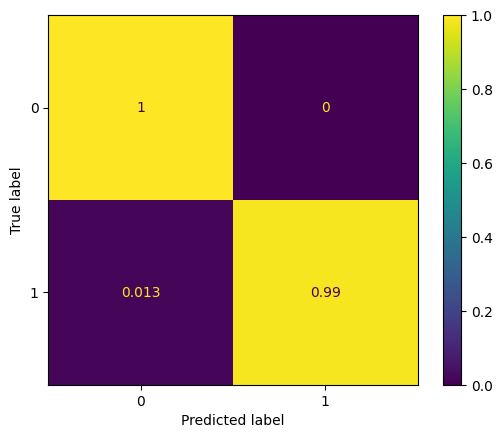

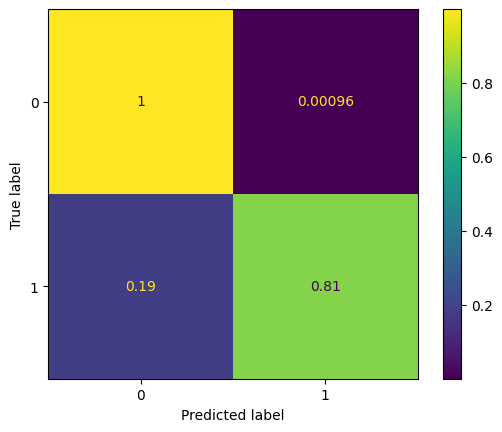

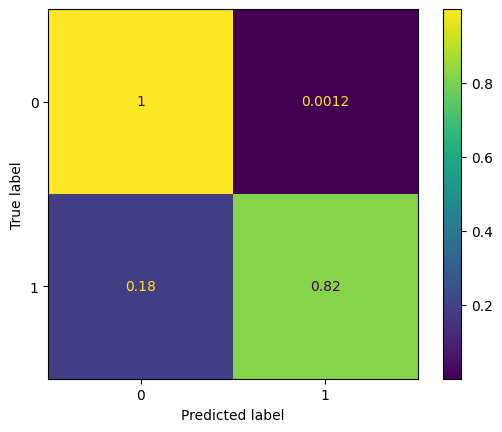

In [ ]:
ConfusionMatrixDisplay.from_estimator(grid_search_et, X_train, y_train, normalize='true')
ConfusionMatrixDisplay.from_estimator(grid_search_et, X_val, y_val, normalize='true')
ConfusionMatrixDisplay.from_estimator(grid_search_et, X_test, y_test, normalize='true')

## 10. Hyperparameter Tuning with Random Search

**[10.1]** Import randint from scipy.stats 

In [ ]:
from scipy.stats import randint

**[10.2]** Let's define the hyperparameters value randomly

In [ ]:
hyperparams_dist = {
    'n_estimators': randint(50, 200, 50),
    'max_depth': randint(10, 30, 5),
    'min_samples_leaf': randint(2, 10, 2),
    'max_features':  randint(2, 15, 2)
    }

**[10.3]** Import RandomizedSearchCV and KFold from sklearn.model_selection

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, KFold

**[10.4]** Instantiate a KFold with 5 splits

In [ ]:
kf_cv = KFold(n_splits=5)

**[10.5]** Instantiate a RandomizedSearchCV with the hyperparameter values and the random forest model

In [ ]:
random_search_et = RandomizedSearchCV(et, hyperparams_dist, random_state= 42, cv=kf_cv, verbose=1)

**[10.6]** Fit the RandomizedSearchCV on the training set

In [ ]:
random_search_et.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=ExtraTreesClassifier(random_state=42),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f84ad8f70a0>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f84ad8f5c90>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f84ab4c8e20>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f84ab4272b0>},
                   random_state=42, verbose=1)

**[10.7]** Display the best set of hyperparameters

In [ ]:
random_search_et.best_params_

{'max_depth': 26,
 'max_features': 12,
 'min_samples_leaf': 4,
 'n_estimators': 158}

**[10.8]** Display the accuracy score and F1 score  on all 3 sets

In [ ]:
y_train_preds = random_search_et.predict(X_train)
y_val_preds = random_search_et.predict(X_val)
y_test_preds = random_search_et.predict(X_test)
print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))
print(accuracy_score(y_test, y_test_preds))
print(f1_score(y_train, y_train_preds))
print(f1_score(y_val, y_val_preds))
print(f1_score(y_test, y_test_preds))

**[10.9]** Import confusion_matrix, ConfusionMatrixDisplay from sklearn.metrics and matplotlib

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

**[10.10]** Plot the confusion matrics for the training, validation and testing sets

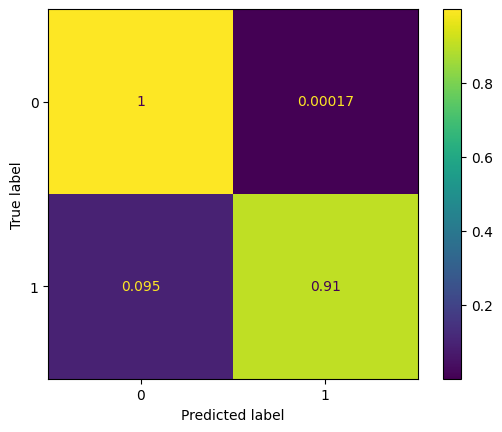

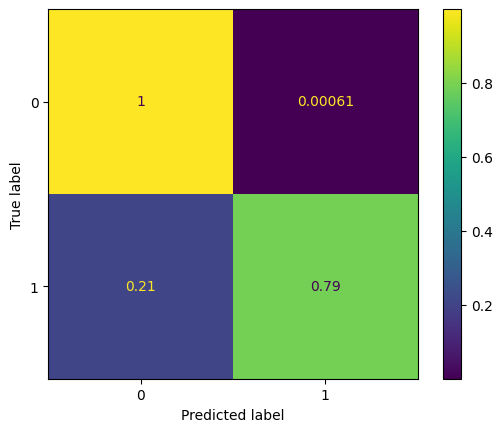

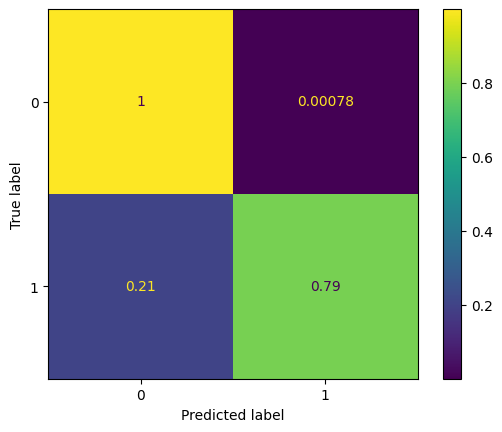

In [ ]:
ConfusionMatrixDisplay.from_estimator(random_search_et, X_train, y_train, normalize='true')
ConfusionMatrixDisplay.from_estimator(random_search_et, X_val, y_val, normalize='true')
ConfusionMatrixDisplay.from_estimator(random_search_et, X_test, y_test, normalize='true')